# IPL Auction
About this project
The IPL 2022 Mega Player auction have featured a total of 600 players who were set to go under the hammer in Bengaluru. The initial list had over 1000 cricketers who had registered for the auction. However, the final list was trimmed to 590. There was a total of 217 slots spread across ten franchises up for grabs. Among the 600 players, 229 are capped players, 371 are uncapped players



In [129]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
data = pd.read_csv("/content/ipl_2022_dataset.csv")
data

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans
...,...,...,...,...,...,...,...,...
628,628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [131]:
data.shape

(633, 8)

In [132]:
data.isna().sum()

Unnamed: 0           0
Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [133]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [134]:
data

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [135]:
data.Team.unique()

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad', 'Unsold'], dtype=object)

In [136]:
data['Base Price'].value_counts()

20 Lakh       344
50 Lakh       104
2 Cr           48
1 Cr           33
Retained       27
75 Lakh        26
1.5 Cr         20
40 Lakh        16
30 Lakh         9
Draft Pick      6
Name: Base Price, dtype: int64

In [137]:
data['Base Price'].unique()

array(['Draft Pick', '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

In [138]:
data['Retention']=data['Base Price']

In [139]:
data

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Retention
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Draft Pick
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Draft Pick
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,2 Cr
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,40 Lakh
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,Draft Pick
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold,20 Lakh
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,20 Lakh
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,20 Lakh
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,20 Lakh


In [140]:
data['Base Price'].replace('Draft Pick',0,inplace=True)

In [141]:
data

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Retention
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Draft Pick
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Draft Pick
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,2 Cr
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,40 Lakh
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Draft Pick
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold,20 Lakh
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,20 Lakh
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,20 Lakh
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,20 Lakh


In [142]:
data['Retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh', '50 Lakh',
      '30 Lakh', '1.5 Cr'],'In Auction',inplace=True)
data

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Retention
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Draft Pick
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Draft Pick
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,In Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,In Auction
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Draft Pick
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold,In Auction
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,In Auction
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,In Auction
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,In Auction


In [143]:
data

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Retention
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Draft Pick
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Draft Pick
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,In Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,In Auction
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Draft Pick
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold,In Auction
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,In Auction
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,In Auction
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,In Auction


In [144]:
data['Base Price']

0            0
1            0
2         2 Cr
3      40 Lakh
4            0
        ...   
628    20 Lakh
629    20 Lakh
630    20 Lakh
631    20 Lakh
632    20 Lakh
Name: Base Price, Length: 633, dtype: object

In [145]:
data['base_price_unit']=data['Base Price'].apply(lambda x:str(x).split(' ')[-1])
data['base_price_unit'].unique()

array(['0', 'Cr', 'Lakh', 'Retained'], dtype=object)

In [146]:
data['base_price_unit']=data['base_price_unit'].replace({'Cr':100,'Lakh':1,'Retained':0})

In [147]:
data['base_price']=data['Base Price'].apply(lambda x:str(x).split(' ')[0])
data['base_price']

0       0
1       0
2       2
3      40
4       0
       ..
628    20
629    20
630    20
631    20
632    20
Name: base_price, Length: 633, dtype: object

In [148]:
data


,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,In Auction,100,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,In Auction,1,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Draft Pick,0,0
...,...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold,In Auction,1,20
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,In Auction,1,20
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,In Auction,1,20
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,In Auction,1,20


In [149]:
data['base_price_unit'] = data['base_price_unit'].astype(int)

In [150]:
data['base_price']=data['base_price'].replace('Retained',0)
data['base_price']

0       0
1       0
2       2
3      40
4       0
       ..
628    20
629    20
630    20
631    20
632    20
Name: base_price, Length: 633, dtype: object

In [151]:
data['base_price']=data['base_price'].astype(float)

In [152]:
data['base_price'].unique()

array([ 0. ,  2. , 40. , 20. ,  1. , 75. , 50. , 30. ,  1.5])

In [153]:
data['base_price_unit'].unique()

array([  0, 100,   1])

In [154]:
data['base_price']=data['base_price']*data['base_price_unit']

In [155]:
data['base_price']

0        0.0
1        0.0
2      200.0
3       40.0
4        0.0
       ...  
628     20.0
629     20.0
630     20.0
631     20.0
632     20.0
Name: base_price, Length: 633, dtype: float64

In [156]:
data.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Draft Pick,0,0.0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Draft Pick,0,0.0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,In Auction,100,200.0
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,In Auction,1,40.0
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Draft Pick,0,0.0


In [157]:
data.drop(['Base Price','base_price_unit'],axis=1,inplace=True)

In [158]:
data.head()

,Player,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Retention,base_price
0,Rashid Khan,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Draft Pick,0.0
1,Hardik Pandya,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Draft Pick,0.0
2,Lockie Ferguson,BOWLER,10.0,1300.0,KKR,Gujarat Titans,In Auction,200.0
3,Rahul Tewatia,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,In Auction,40.0
4,Shubman Gill,BATTER,8.0,1040.0,KKR,Gujarat Titans,Draft Pick,0.0


In [159]:
data.isna().sum()

Player               0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
Retention            0
base_price           0
dtype: int64

In [160]:
data['COST IN ₹ (CR.)']=data['COST IN ₹ (CR.)'].fillna(0)

In [161]:
data['Cost IN $ (000)']=data['Cost IN $ (000)'].fillna(0)

In [162]:
data['2021 Squad']=data['2021 Squad'].fillna('NotParticipated')

In [163]:
teams = data[data['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [164]:
data['status'] = data['Team'].replace(teams,'sold')
data['status']

0        sold
1        sold
2        sold
3        sold
4        sold
        ...  
628    Unsold
629    Unsold
630    Unsold
631    Unsold
632    Unsold
Name: status, Length: 633, dtype: object

In [165]:
data['COST IN ₹ (CR.)']=data['COST IN ₹ (CR.)']*100

In [166]:
data.head()

,Player,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Retention,base_price,status
0,Rashid Khan,BOWLER,1500.0,1950.0,SRH,Gujarat Titans,Draft Pick,0.0,sold
1,Hardik Pandya,ALL-ROUNDER,1500.0,1950.0,MI,Gujarat Titans,Draft Pick,0.0,sold
2,Lockie Ferguson,BOWLER,1000.0,1300.0,KKR,Gujarat Titans,In Auction,200.0,sold
3,Rahul Tewatia,ALL-ROUNDER,900.0,1170.0,RR,Gujarat Titans,In Auction,40.0,sold
4,Shubman Gill,BATTER,800.0,1040.0,KKR,Gujarat Titans,Draft Pick,0.0,sold


In [167]:
data=data.rename(columns = {'TYPE':'Type','COST IN ₹ (CR.)':'Sold_for_lakh','Cost IN $ (000)':'Cost_in_dollars','2021 Squad':'Prev_team','Team':'Curr_team'})

In [168]:
data=data.rename(columns = {'Retention':'retention'})

In [169]:
data.head()

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,retention,base_price,status
0,Rashid Khan,BOWLER,1500.0,1950.0,SRH,Gujarat Titans,Draft Pick,0.0,sold
1,Hardik Pandya,ALL-ROUNDER,1500.0,1950.0,MI,Gujarat Titans,Draft Pick,0.0,sold
2,Lockie Ferguson,BOWLER,1000.0,1300.0,KKR,Gujarat Titans,In Auction,200.0,sold
3,Rahul Tewatia,ALL-ROUNDER,900.0,1170.0,RR,Gujarat Titans,In Auction,40.0,sold
4,Shubman Gill,BATTER,800.0,1040.0,KKR,Gujarat Titans,Draft Pick,0.0,sold


In [170]:
data[data['Player'].duplicated(keep=False)]

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,retention,base_price,status
62,Lalit Yadav,ALL-ROUNDER,65.0,84.5,DC,Delhi Capitals,In Auction,20.0,sold
240,Amit Mishra,BOWLER,0.0,0.0,DC,Unsold,In Auction,150.0,Unsold
499,Amit Mishra,BOWLER,0.0,0.0,NotParticipated,Unsold,In Auction,20.0,Unsold
518,Shivam Sharma,ALL-ROUNDER,0.0,0.0,NotParticipated,Unsold,In Auction,20.0,Unsold
530,Lalit Yadav,BOWLER,0.0,0.0,NotParticipated,Unsold,In Auction,20.0,Unsold
537,Shubham Singh,ALL-ROUNDER,0.0,0.0,NotParticipated,Unsold,In Auction,20.0,Unsold
544,Shubham Singh,BOWLER,0.0,0.0,NotParticipated,Unsold,In Auction,20.0,Unsold
569,Shivam Sharma,ALL-ROUNDER,0.0,0.0,NotParticipated,Unsold,In Auction,20.0,Unsold


#EDA

#how many players participated in 2022 auction

In [171]:
data.head()

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,retention,base_price,status
0,Rashid Khan,BOWLER,1500.0,1950.0,SRH,Gujarat Titans,Draft Pick,0.0,sold
1,Hardik Pandya,ALL-ROUNDER,1500.0,1950.0,MI,Gujarat Titans,Draft Pick,0.0,sold
2,Lockie Ferguson,BOWLER,1000.0,1300.0,KKR,Gujarat Titans,In Auction,200.0,sold
3,Rahul Tewatia,ALL-ROUNDER,900.0,1170.0,RR,Gujarat Titans,In Auction,40.0,sold
4,Shubman Gill,BATTER,800.0,1040.0,KKR,Gujarat Titans,Draft Pick,0.0,sold


In [172]:
data.shape

(633, 9)

In [173]:
(data['Player']).shape

(633,)

#participation in based on role type

In [174]:
TYPE=data['Type'].value_counts()


In [175]:
TYPE.reset_index()

,index,Type
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

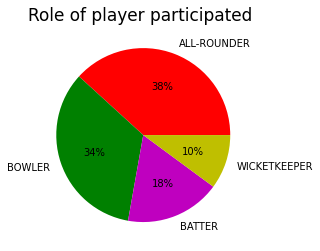

In [176]:
#percentage representation pie chart
plt.pie(TYPE.values,labels=TYPE.index,labeldistance=1.13,autopct='%1.0f%%',colors='RGMY')  
plt.title("Role of player participated ",fontsize=17)
plt.plot()

#how many players where shown in ipl 2022 auction(sold,unsold)

Text(0.5, 1.0, 'Status Of Players')

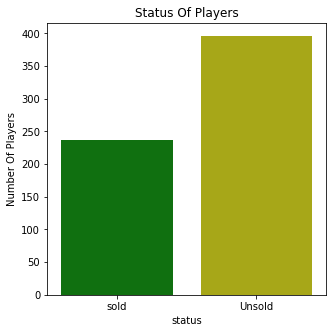

In [177]:
plt.figure(figsize=(5,5))
fig=sns.countplot(data['status'],palette=['G','Y'])                                 
plt.ylabel('Number Of Players')
plt.title('Status Of Players')

#how many player bought by each team

In [178]:
data['Curr_team'].value_counts()

Unsold                         396
Chennai Super Kings             25
Kolkata Knight Riders           25
Punjab Kings                    25
Mumbai Indians                  25
Delhi Capitals                  24
Rajasthan Royals                24
Sunrisers Hyderabad             23
Gujarat Titans                  22
Lucknow Super Giants            22
Royal Challengers Bangalore     22
Name: Curr_team, dtype: int64

[]

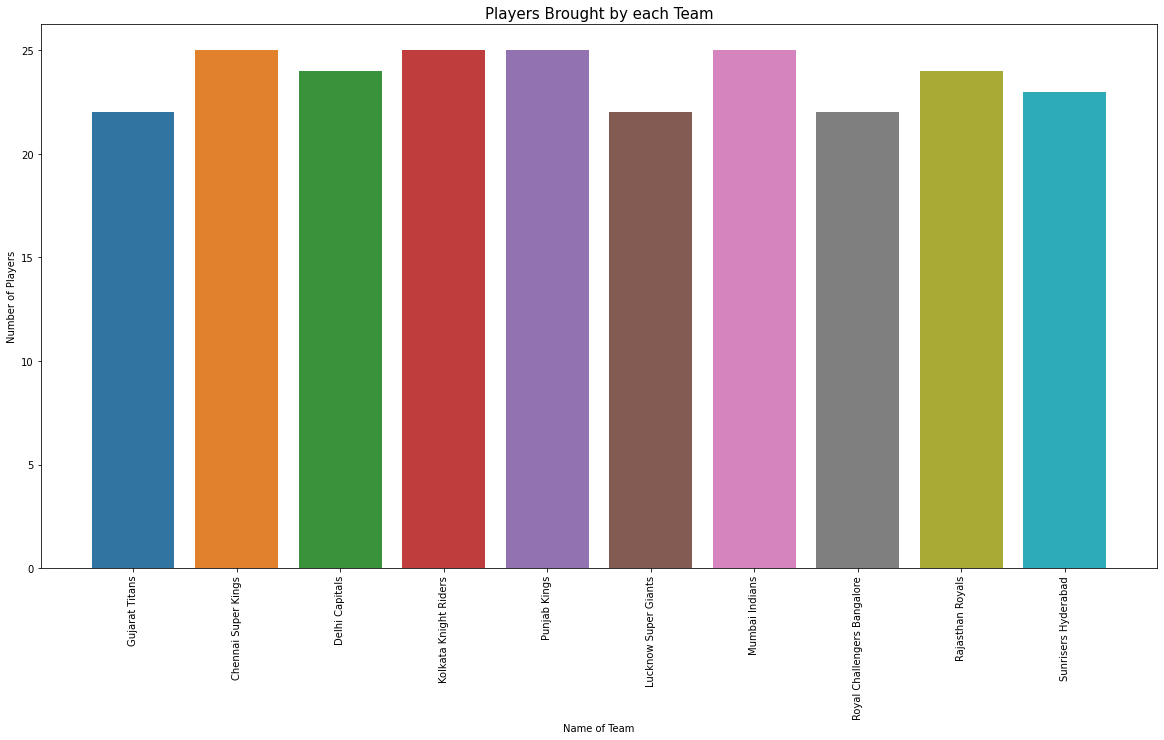

In [179]:
plt.figure(figsize=(20,10))
fig = sns.countplot(data[data['Curr_team']!='Unsold'] ['Curr_team'])
plt.xlabel('Name of Team')
plt.ylabel('Number of Players')
plt.title('Players Brought by each Team', fontsize=15)
plt.xticks(rotation=90)
plt.plot()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

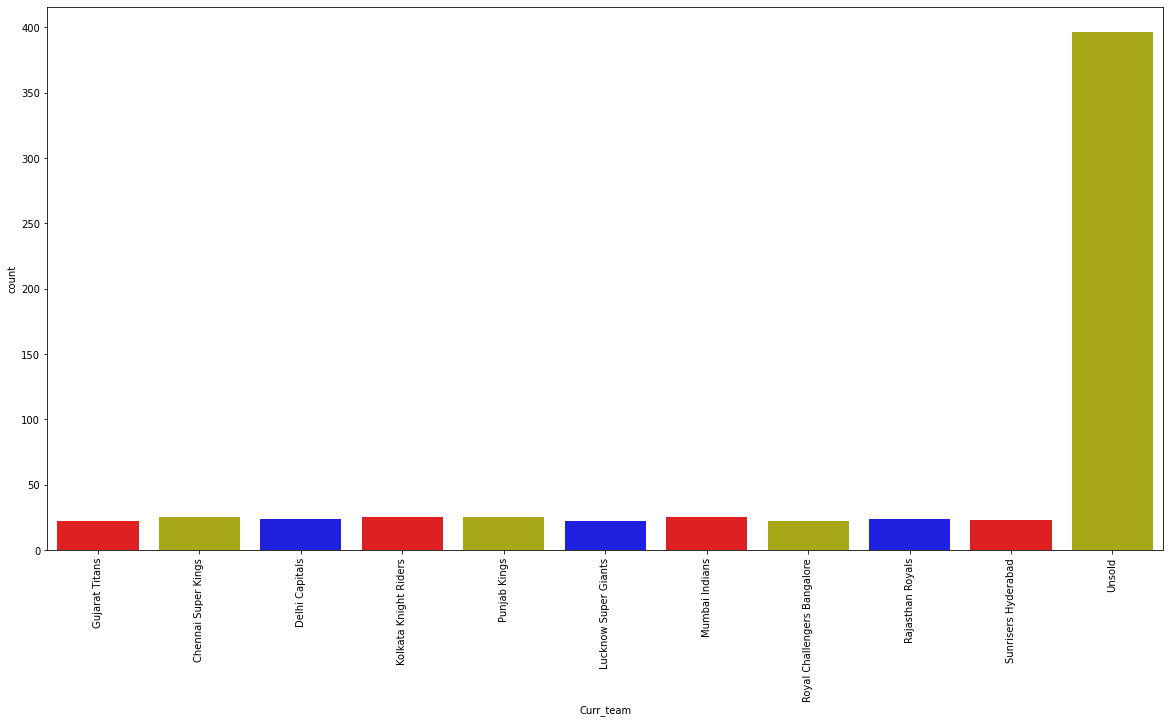

In [180]:
plt.figure(figsize=(20,10))
sns.countplot(data['Curr_team'],palette=['R','Y','B'])
plt.xticks(rotation=90)

#how many players retained and draft pick by each team


In [181]:
data.retention.value_counts()

In Auction    600
Retained       27
Draft Pick      6
Name: retention, dtype: int64

In [182]:
data.groupby(["Curr_team","retention"])["retention"].count()[:-1]

Curr_team                    retention 
Chennai Super Kings          In Auction    21
                             Retained       4
Delhi Capitals               In Auction    20
                             Retained       4
Gujarat Titans               Draft Pick     3
                             In Auction    19
Kolkata Knight Riders        In Auction    21
                             Retained       4
Lucknow Super Giants         Draft Pick     3
                             In Auction    19
Mumbai Indians               In Auction    21
                             Retained       4
Punjab Kings                 In Auction    23
                             Retained       2
Rajasthan Royals             In Auction    21
                             Retained       3
Royal Challengers Bangalore  In Auction    19
                             Retained       3
Sunrisers Hyderabad          In Auction    20
                             Retained       3
Name: retention, dtype: int64

#How many players are bought for each role

In [183]:
data.groupby(["status","Type"])["Player"].count().reset_index()

,status,Type,Player
0,Unsold,ALL-ROUNDER,154
1,Unsold,BATTER,67
2,Unsold,BOWLER,138
3,Unsold,WICKETKEEPER,37
4,sold,ALL-ROUNDER,88
5,sold,BATTER,45
6,sold,BOWLER,77
7,sold,WICKETKEEPER,27


#which are the players who particpated in ipl 2021 and will be participating in ipl 2022 and playing in same team


In [184]:
data.replace({'SRH':'Sunrisers Hyderabad','CSK':'Chennai Super Kings','MI':'Mumbai Indians',
            'KKR':'Kolkata Knight Riders','RR':'Rajasthan Royals','PBKS':'Punjab Kings',
            'DC':'Delhi Capitals','RCB':'Royal Challengers Bangalore'},inplace =True)
 

In [185]:

same_team = data[(data['Curr_team']==data['Prev_team']) & (data['retention']!='Retained')]
same_team

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,retention,base_price,status
23,Deepak Chahar,BOWLER,1400.0,1820.0,Chennai Super Kings,Chennai Super Kings,In Auction,200.0,sold
26,Ambati Rayudu,WICKETKEEPER,675.0,877.5,Chennai Super Kings,Chennai Super Kings,In Auction,200.0,sold
28,Dwayne Bravo,ALL-ROUNDER,440.0,572.0,Chennai Super Kings,Chennai Super Kings,In Auction,200.0,sold
31,Robin Uthappa,BATTER,200.0,260.0,Chennai Super Kings,Chennai Super Kings,In Auction,200.0,sold
32,Mitchell Santner,ALL-ROUNDER,190.0,247.0,Chennai Super Kings,Chennai Super Kings,In Auction,100.0,sold
39,K.Bhagath Varma,ALL-ROUNDER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,In Auction,20.0,sold
41,N. Jagadeesan,WICKETKEEPER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,In Auction,20.0,sold
42,C.Hari Nishaanth,BATTER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,In Auction,20.0,sold
43,K.M. Asif,BOWLER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,In Auction,20.0,sold
62,Lalit Yadav,ALL-ROUNDER,65.0,84.5,Delhi Capitals,Delhi Capitals,In Auction,20.0,sold


In [186]:
data[(data['Curr_team']==data['Prev_team'])  & (data['retention']!='Retained')]

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,retention,base_price,status
23,Deepak Chahar,BOWLER,1400.0,1820.0,Chennai Super Kings,Chennai Super Kings,In Auction,200.0,sold
26,Ambati Rayudu,WICKETKEEPER,675.0,877.5,Chennai Super Kings,Chennai Super Kings,In Auction,200.0,sold
28,Dwayne Bravo,ALL-ROUNDER,440.0,572.0,Chennai Super Kings,Chennai Super Kings,In Auction,200.0,sold
31,Robin Uthappa,BATTER,200.0,260.0,Chennai Super Kings,Chennai Super Kings,In Auction,200.0,sold
32,Mitchell Santner,ALL-ROUNDER,190.0,247.0,Chennai Super Kings,Chennai Super Kings,In Auction,100.0,sold
39,K.Bhagath Varma,ALL-ROUNDER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,In Auction,20.0,sold
41,N. Jagadeesan,WICKETKEEPER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,In Auction,20.0,sold
42,C.Hari Nishaanth,BATTER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,In Auction,20.0,sold
43,K.M. Asif,BOWLER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,In Auction,20.0,sold
62,Lalit Yadav,ALL-ROUNDER,65.0,84.5,Delhi Capitals,Delhi Capitals,In Auction,20.0,sold


In [187]:
same_team[same_team.Curr_team == 'Royal Challengers Bangalore']

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,retention,base_price,status
170,Wanindu Hasaranga,ALL-ROUNDER,1075.0,1397.5,Royal Challengers Bangalore,Royal Challengers Bangalore,In Auction,100.0,sold
171,Harshal Patel,ALL-ROUNDER,1075.0,1397.5,Royal Challengers Bangalore,Royal Challengers Bangalore,In Auction,200.0,sold
177,Shahbaz Ahamad,ALL-ROUNDER,240.0,312.0,Royal Challengers Bangalore,Royal Challengers Bangalore,In Auction,30.0,sold
181,Finn Allen,BATTER,80.0,104.0,Royal Challengers Bangalore,Royal Challengers Bangalore,In Auction,50.0,sold
185,Suyash Prabhudessai,ALL-ROUNDER,30.0,39.0,Royal Challengers Bangalore,Royal Challengers Bangalore,In Auction,20.0,sold
187,Akash Deep,BOWLER,20.0,26.0,Royal Challengers Bangalore,Royal Challengers Bangalore,In Auction,20.0,sold


[]

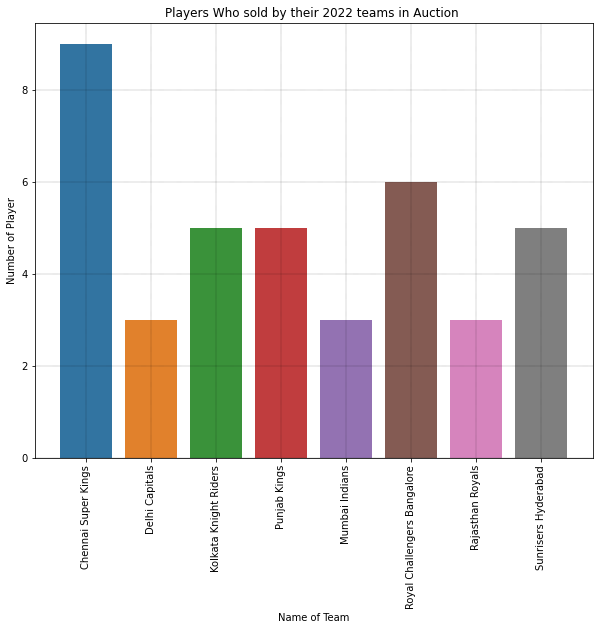

In [188]:
plt.figure(figsize=(10,8))
sns.countplot(same_team['Curr_team'])
plt.title('Players Who sold by their 2022 teams in Auction ')
plt.xlabel('Name of Team')
plt.ylabel('Number of Player')
plt.xticks(rotation = 90)
plt.grid(color='Black',linestyle="--",linewidth=0.2)
plt.plot()

#no.of players in each team based on roles(types)

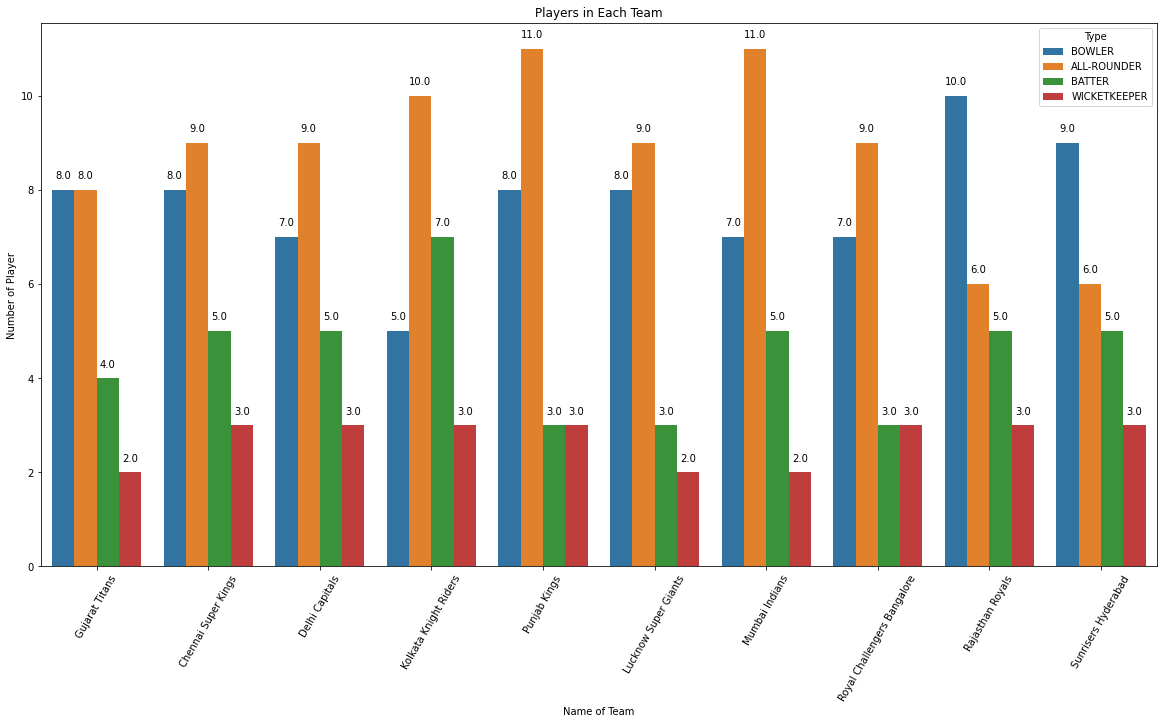

In [189]:
plt.figure(figsize=(20,10))
fig = sns.countplot(data[data['Curr_team']!='Unsold']['Curr_team'],hue=data['Type'])
plt.title('Players in Each Team')
plt.xlabel('Name of Team')
plt.ylabel('Number of Player')


plt.xticks(rotation = 60)

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()),
                 ha = 'center', va = 'center', xytext=(0,14), textcoords = 'offset points')

#highest bid by each team

In [190]:
data.head()

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,retention,base_price,status
0,Rashid Khan,BOWLER,1500.0,1950.0,Sunrisers Hyderabad,Gujarat Titans,Draft Pick,0.0,sold
1,Hardik Pandya,ALL-ROUNDER,1500.0,1950.0,Mumbai Indians,Gujarat Titans,Draft Pick,0.0,sold
2,Lockie Ferguson,BOWLER,1000.0,1300.0,Kolkata Knight Riders,Gujarat Titans,In Auction,200.0,sold
3,Rahul Tewatia,ALL-ROUNDER,900.0,1170.0,Rajasthan Royals,Gujarat Titans,In Auction,40.0,sold
4,Shubman Gill,BATTER,800.0,1040.0,Kolkata Knight Riders,Gujarat Titans,Draft Pick,0.0,sold


In [191]:
data[data['retention']=='In Auction'].groupby(['Curr_team'])['Sold_for_lakh'].max()[:-1].sort_values(ascending=False)

Curr_team
Mumbai Indians                 1525.0
Chennai Super Kings            1400.0
Kolkata Knight Riders          1225.0
Punjab Kings                   1150.0
Delhi Capitals                 1075.0
Royal Challengers Bangalore    1075.0
Sunrisers Hyderabad            1075.0
Gujarat Titans                 1000.0
Lucknow Super Giants           1000.0
Rajasthan Royals               1000.0
Name: Sold_for_lakh, dtype: float64

In [192]:
data[(data['Curr_team']== 'Chennai Super Kings') & (data['retention']=='In Auction')  ].max()

Player                Tushar Deshpande
Type                      WICKETKEEPER
Sold_for_lakh                   1400.0
Cost_in_dollars                 1820.0
Prev_team             Rajasthan Royals
Curr_team          Chennai Super Kings
retention                   In Auction
base_price                       200.0
status                            sold
dtype: object

In [193]:
data[(data['Curr_team']== 'Chennai Super Kings') & (data['retention']=='In Auction') & (data['Type'] =='BOWLER')].max()   

Player                Tushar Deshpande
Type                            BOWLER
Sold_for_lakh                   1400.0
Cost_in_dollars                 1820.0
Prev_team              NotParticipated
Curr_team          Chennai Super Kings
retention                   In Auction
base_price                       200.0
status                            sold
dtype: object

In [194]:
data[(data['Curr_team']== 'Chennai Super Kings') & (data['retention']=='In Auction')]

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,retention,base_price,status
23,Deepak Chahar,BOWLER,1400.0,1820.0,Chennai Super Kings,Chennai Super Kings,In Auction,200.0,sold
26,Ambati Rayudu,WICKETKEEPER,675.0,877.5,Chennai Super Kings,Chennai Super Kings,In Auction,200.0,sold
28,Dwayne Bravo,ALL-ROUNDER,440.0,572.0,Chennai Super Kings,Chennai Super Kings,In Auction,200.0,sold
29,Shivam Dube,ALL-ROUNDER,400.0,520.0,Rajasthan Royals,Chennai Super Kings,In Auction,50.0,sold
30,Chris Jordan,ALL-ROUNDER,360.0,468.0,Punjab Kings,Chennai Super Kings,In Auction,200.0,sold
31,Robin Uthappa,BATTER,200.0,260.0,Chennai Super Kings,Chennai Super Kings,In Auction,200.0,sold
32,Mitchell Santner,ALL-ROUNDER,190.0,247.0,Chennai Super Kings,Chennai Super Kings,In Auction,100.0,sold
33,Adam Milne,BOWLER,190.0,247.0,Mumbai Indians,Chennai Super Kings,In Auction,150.0,sold
34,Rajvardhan Hangargekar,ALL-ROUNDER,150.0,195.0,NotParticipated,Chennai Super Kings,In Auction,30.0,sold
35,Prashant Solanki,BOWLER,120.0,156.0,NotParticipated,Chennai Super Kings,In Auction,20.0,sold


#top5 batsmen  bid 2022


In [195]:
data['Sold_for_lakh'].sort_values(ascending =False).head()

121    1700.0
22     1600.0
143    1600.0
47     1600.0
144    1525.0
Name: Sold_for_lakh, dtype: float64

In [196]:
data[(data['retention']=='In Acution') & (data['Type']=='BATTER')].sort_values(by='Sold_for_lakh',ascending = False).head()

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,retention,base_price,status


#highest paid retained


In [197]:
data[(data['retention']=='Retained') ].sort_values(by='Sold_for_lakh',ascending = False).head()

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,retention,base_price,status
22,Ravindra Jadeja,ALL-ROUNDER,1600.0,2080.0,Chennai Super Kings,Chennai Super Kings,Retained,0.0,sold
47,Rishabh Pant,WICKETKEEPER,1600.0,2080.0,Delhi Capitals,Delhi Capitals,Retained,0.0,sold
143,Rohit Sharma,BATTER,1600.0,2080.0,Mumbai Indians,Mumbai Indians,Retained,0.0,sold
168,Virat Kohli,BATTER,1500.0,1950.0,Royal Challengers Bangalore,Royal Challengers Bangalore,Retained,0.0,sold
214,Kane Williamson,BATTER,1400.0,1820.0,Sunrisers Hyderabad,Sunrisers Hyderabad,Retained,0.0,sold


#Amount spent by each team in auction


In [198]:
amount_spent = data.groupby('Curr_team')['Sold_for_lakh'].sum()[:-1]
amount_spent


Curr_team
Chennai Super Kings            8705.0
Delhi Capitals                 8640.0
Gujarat Titans                 8965.0
Kolkata Knight Riders          8155.0
Lucknow Super Giants           8940.0
Mumbai Indians                 8990.0
Punjab Kings                   8455.0
Rajasthan Royals               8905.0
Royal Challengers Bangalore    8845.0
Sunrisers Hyderabad            8990.0
Name: Sold_for_lakh, dtype: float64

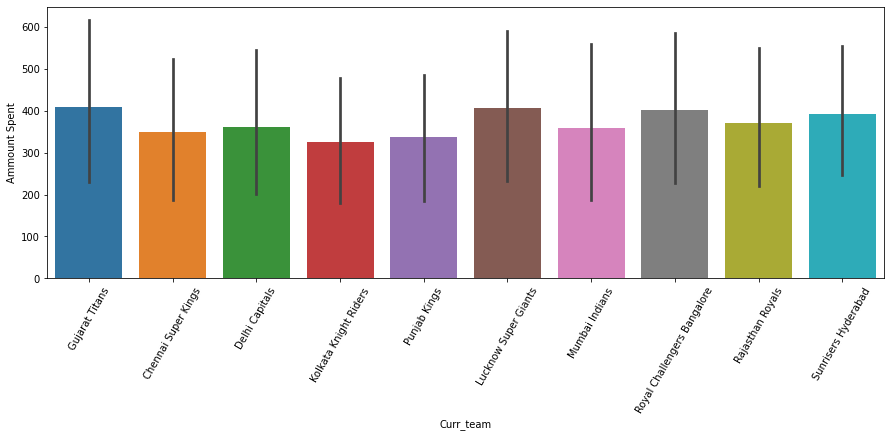

In [199]:
plt.figure(figsize=(15,5))
sns.barplot('Curr_team','Sold_for_lakh', data = data[data['Curr_team']!='Unsold'])
plt.xticks(rotation=60)
plt.ylabel('Ammount Spent')
plt.show()

#List of players who Played IPL 2021 but went unsold in IPL 2022

In [200]:
unsold_star = data[(data.Prev_team != 'NotParticipated') & (data.Curr_team == 'Unsold')][['Player','Prev_team']]
unsold_star

,Player,Prev_team
237,Suresh Raina,Chennai Super Kings
238,Steve Smith,Delhi Capitals
239,Shakib Al Hasan,Kolkata Knight Riders
240,Amit Mishra,Delhi Capitals
241,Adil Rashid,Punjab Kings
242,Imran Tahir,Chennai Super Kings
243,Mujeeb Zadran,Sunrisers Hyderabad
244,Adam Zampa,Royal Challengers Bangalore
245,Rajat Patidar,Royal Challengers Bangalore
246,Mohammed Azharuddeen,Royal Challengers Bangalore


In [201]:
unsold_stars=data[(data.Prev_team != 'NotParticipated') & (data.Curr_team == 'Unsold')]
unsold_stars

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,retention,base_price,status
237,Suresh Raina,BATTER,0.0,0.0,Chennai Super Kings,Unsold,In Auction,200.0,Unsold
238,Steve Smith,BATTER,0.0,0.0,Delhi Capitals,Unsold,In Auction,200.0,Unsold
239,Shakib Al Hasan,ALL-ROUNDER,0.0,0.0,Kolkata Knight Riders,Unsold,In Auction,200.0,Unsold
240,Amit Mishra,BOWLER,0.0,0.0,Delhi Capitals,Unsold,In Auction,150.0,Unsold
241,Adil Rashid,BOWLER,0.0,0.0,Punjab Kings,Unsold,In Auction,200.0,Unsold
242,Imran Tahir,BOWLER,0.0,0.0,Chennai Super Kings,Unsold,In Auction,200.0,Unsold
243,Mujeeb Zadran,BOWLER,0.0,0.0,Sunrisers Hyderabad,Unsold,In Auction,200.0,Unsold
244,Adam Zampa,BOWLER,0.0,0.0,Royal Challengers Bangalore,Unsold,In Auction,200.0,Unsold
245,Rajat Patidar,BATTER,0.0,0.0,Royal Challengers Bangalore,Unsold,In Auction,20.0,Unsold
246,Mohammed Azharuddeen,WICKETKEEPER,0.0,0.0,Royal Challengers Bangalore,Unsold,In Auction,20.0,Unsold


In [202]:
unsold_stars = unsold_stars.groupby('Prev_team')['Player'].count()
unsold_stars

Prev_team
Chennai Super Kings            3
Delhi Capitals                 7
Kolkata Knight Riders          5
Mumbai Indians                 6
Punjab Kings                   5
Rajasthan Royals               3
Royal Challengers Bangalore    7
Sunrisers Hyderabad            4
Name: Player, dtype: int64

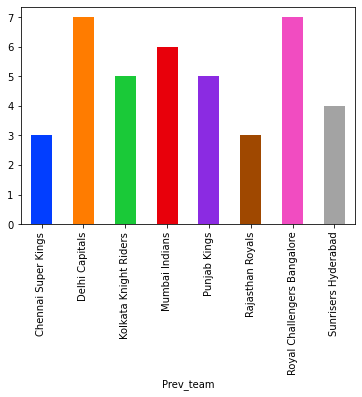

In [203]:
unsold_stars.plot(kind='bar',color = sns.color_palette("bright"))